In [1]:
import pertpy as pt
import scanpy as sc
import numpy as np

import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/utils.py:429: FutureWar

In [2]:
'''
adata=pt.dt.papalexi_2021()
print(adata)
adata=adata["rna"]
for i in adata.obs.columns[1:]:
    if not isinstance(adata.obs[i][0] , str):
        continue
    uniquei=np.unique(adata.obs[i])
    if len(uniquei)<=30:
        print(i,uniquei)

print(adata.X[:10,:10])

import scanpy as sc
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var["highly_variable"]]
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata)
sc.tl.umap(adata)
adata.write("../data/ECCITE.h5ad")
'''

'\nadata=pt.dt.papalexi_2021()\nprint(adata)\nadata=adata["rna"]\nfor i in adata.obs.columns[1:]:\n    if not isinstance(adata.obs[i][0] , str):\n        continue\n    uniquei=np.unique(adata.obs[i])\n    if len(uniquei)<=30:\n        print(i,uniquei)\n\nprint(adata.X[:10,:10])\n\nimport scanpy as sc\nsc.pp.filter_cells(adata, min_genes=100)\nsc.pp.filter_genes(adata, min_cells=3)\nsc.pp.normalize_total(adata, target_sum=1e4)\nsc.pp.log1p(adata)\nsc.pp.highly_variable_genes(adata, n_top_genes=2000)\nadata = adata[:, adata.var["highly_variable"]]\nsc.tl.pca(adata, svd_solver="arpack")\nsc.pp.neighbors(adata)\nsc.tl.umap(adata)\nadata.write("../data/ECCITE.h5ad")\n'

AnnData object with n_obs × n_vars = 20729 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_GDO', 'nCount_ADT', 'nFeature_ADT', 'percent.mito', 'MULTI_ID', 'HTO_classification', 'guide_ID', 'gene_target', 'NT', 'perturbation', 'replicate', 'S.Score', 'G2M.Score', 'Phase', 'n_genes'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'HTO_classification_colors', 'MULTI_ID_colors', 'Phase_colors', 'gene_target_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'perturbation_colors', 'replicate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'
(array(['NT', 'Perturbed'], dtype=object), array([ 2386, 18343]))


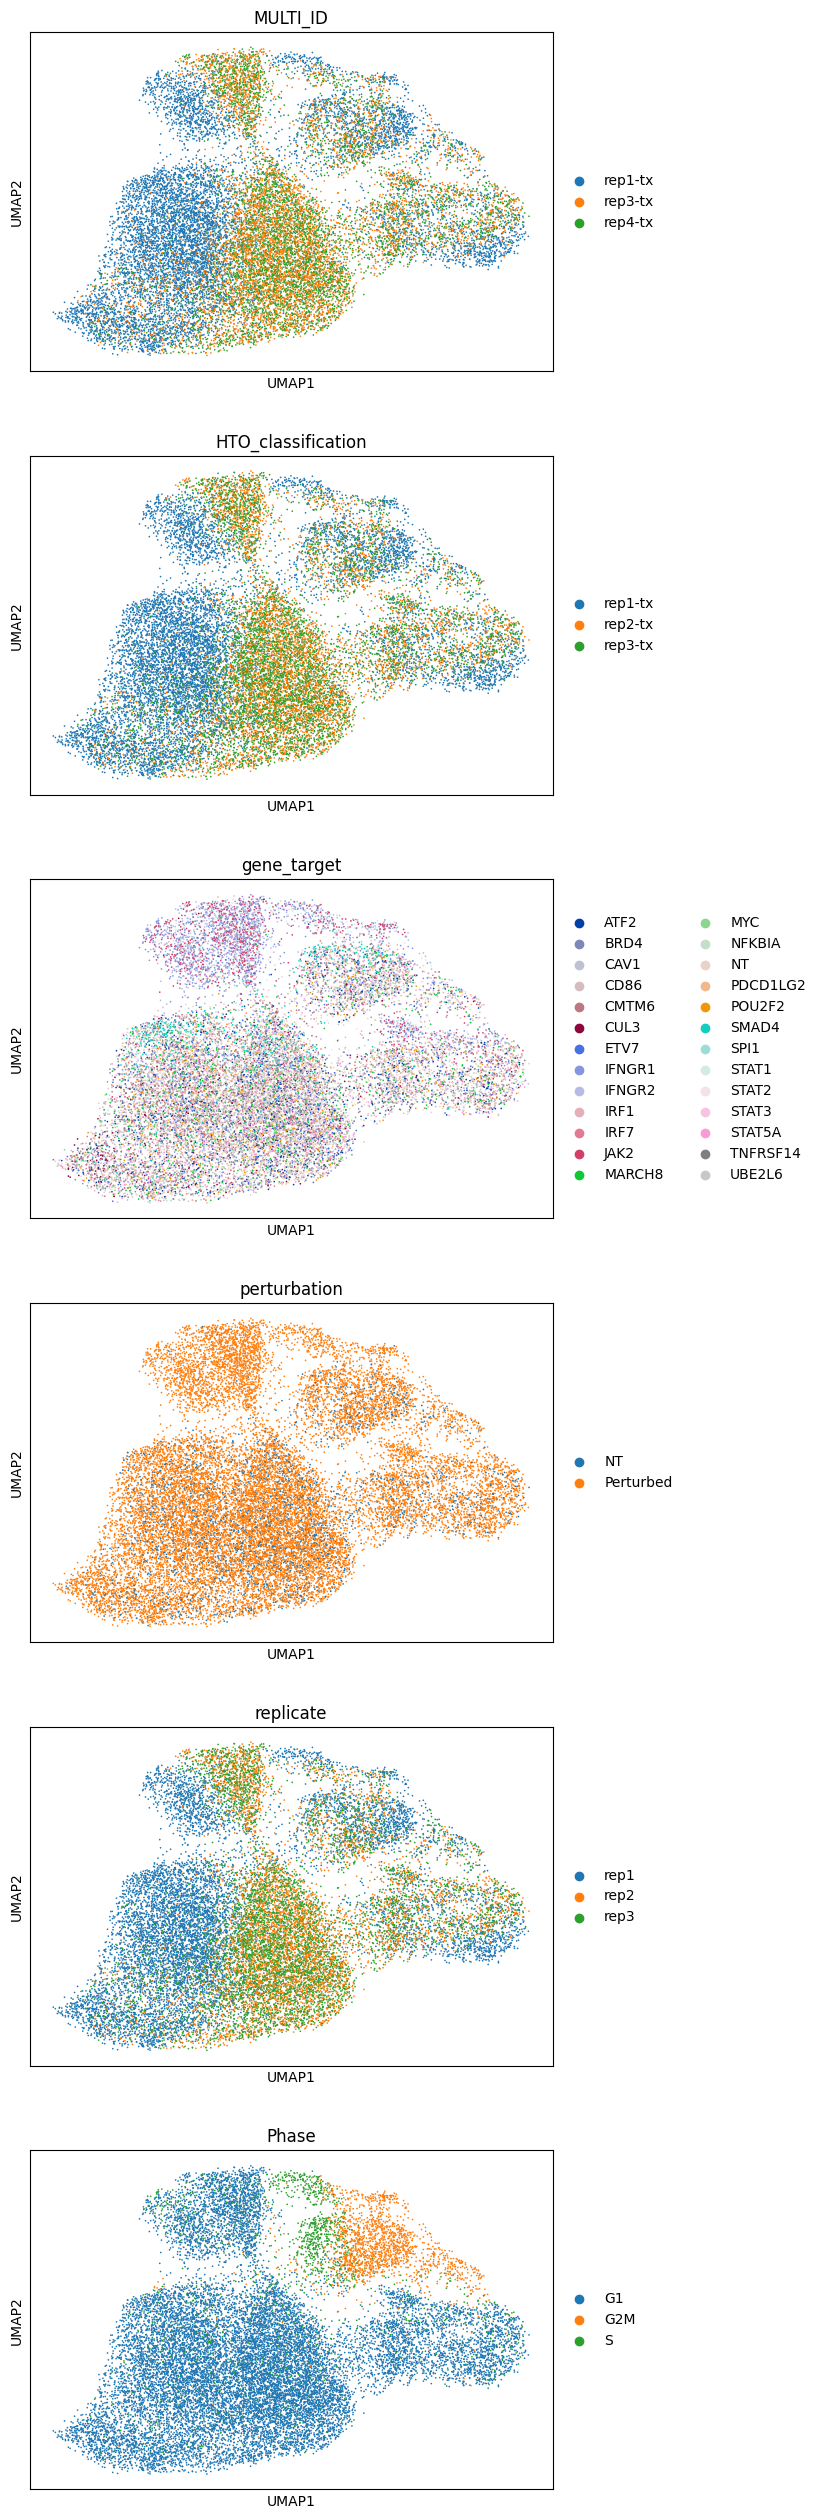

In [3]:
adata=sc.read_h5ad("../data/ECCITE.h5ad")
print(adata)
print(np.unique(adata.obs["perturbation"],return_counts=True))
sc.pl.umap(adata,color=["MULTI_ID","HTO_classification","gene_target","perturbation","replicate","Phase"],ncols=1)

In [4]:
for i in adata.obs.columns[1:]:
    if not isinstance(adata.obs[i][0] , str):
        continue
    uniquei=np.unique(adata.obs[i])
    if len(uniquei)<=30:
        print(i,uniquei)

print(adata.X[:10,:10])

MULTI_ID ['rep1-tx' 'rep3-tx' 'rep4-tx']
HTO_classification ['rep1-tx' 'rep2-tx' 'rep3-tx']
gene_target ['ATF2' 'BRD4' 'CAV1' 'CD86' 'CMTM6' 'CUL3' 'ETV7' 'IFNGR1' 'IFNGR2'
 'IRF1' 'IRF7' 'JAK2' 'MARCH8' 'MYC' 'NFKBIA' 'NT' 'PDCD1LG2' 'POU2F2'
 'SMAD4' 'SPI1' 'STAT1' 'STAT2' 'STAT3' 'STAT5A' 'TNFRSF14' 'UBE2L6']
perturbation ['NT' 'Perturbed']
replicate ['rep1' 'rep2' 'rep3']
Phase ['G1' 'G2M' 'S']
  (6, 1)	0.5947323441505432
  (0, 2)	0.45817938446998596
  (3, 2)	1.0809301137924194
  (4, 2)	2.1085922718048096
  (5, 2)	2.20072865486145
  (6, 2)	2.117809772491455
  (7, 2)	1.5791527032852173
  (8, 2)	2.4346671104431152
  (9, 2)	2.2123894691467285
  (9, 8)	0.7017057538032532


In [ ]:
from ndreamer import NDreamer

model = NDreamer(adata, condition_key='gene_target', contorl_name='NT', num_hvg=2000, require_batch=True,
                            batch_key='replicate',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ECCITE/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ECCITE/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

Start data preprocessing
Original adata.obs[batch_key] back up to adata.obs['batch_backup']
Original adata.obs[condition_key] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'NT': 0, 'STAT2': 1, 'CAV1': 2, 'STAT1': 3, 'CD86': 4, 'IRF7': 5, 'ATF2': 6, 'STAT3': 7, 'JAK2': 8, 'NFKBIA': 9, 'SMAD4': 10, 'STAT5A': 11, 'CMTM6': 12, 'IFNGR1': 13, 'UBE2L6': 14, 'PDCD1LG2': 15, 'CUL3': 16, 'BRD4': 17, 'MARCH8': 18, 'IRF1': 19, 'POU2F2': 20, 'ETV7': 21, 'IFNGR2': 22, 'TNFRSF14': 23, 'SPI1': 24, 'MYC': 25}
Condition mapping to adata.obs['batch']: {'rep1': 0, 'rep3': 1, 'rep2': 2}
Calculating the clusters
number of cells in group rep1_PDCD1LG2 less than 200, too small, discard
number of cells in group rep1_CUL3 less than 200, too small, discard
number of cells in group rep1_BRD4 less than 200, too small, discard
number of cells in group rep1_SPI1 less than 200, too small, discard
number of cells in group rep1_MYC less than 200, too small, discard
number of cel

Overall Progress:   0%|          | 0/147 [00:00<?, ?it/s]

In [ ]:
print(len(np.unique(model.DL_model.adata.obs["condition_backup"])))
print(len(np.unique(model.DL_model.adata.obs["condition"])))
print(model.DL_model.VQ_VAE.condition_embedding)

In [ ]:
adata1=model.DL_model.adata.copy()
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["MULTI_ID","HTO_classification","gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["MULTI_ID","HTO_classification","gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

In [ ]:
import rpy2.robjects as robjects

import anndata2ri
anndata2ri.activate()
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
# Update R's library paths
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))

from metrics import calculate_metrics

try:
    calculate_metrics(adata1, batch_key='gene_target', celltype_key="Phase", all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')
except:
    calculate_metrics(adata1, batch_key='gene_target', celltype_key="Phase", all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')

In [ ]:
model = NDreamer(adata, condition_key='perturbation', contorl_name='NT', num_hvg=2000, require_batch=True,
                            batch_key='replicate',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ECCITE_perturbation/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ECCITE_perturbation/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

In [ ]:
adata1=model.DL_model.adata.copy()
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["MULTI_ID","HTO_classification","gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["MULTI_ID","HTO_classification","gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

In [ ]:
model = NDreamer(adata, condition_key='perturbation', contorl_name='NT', num_hvg=2000, require_batch=False,
                            batch_key=None,
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=10, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ECCITE_perturbation_nobatch/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ECCITE_perturbation_nobatch/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)

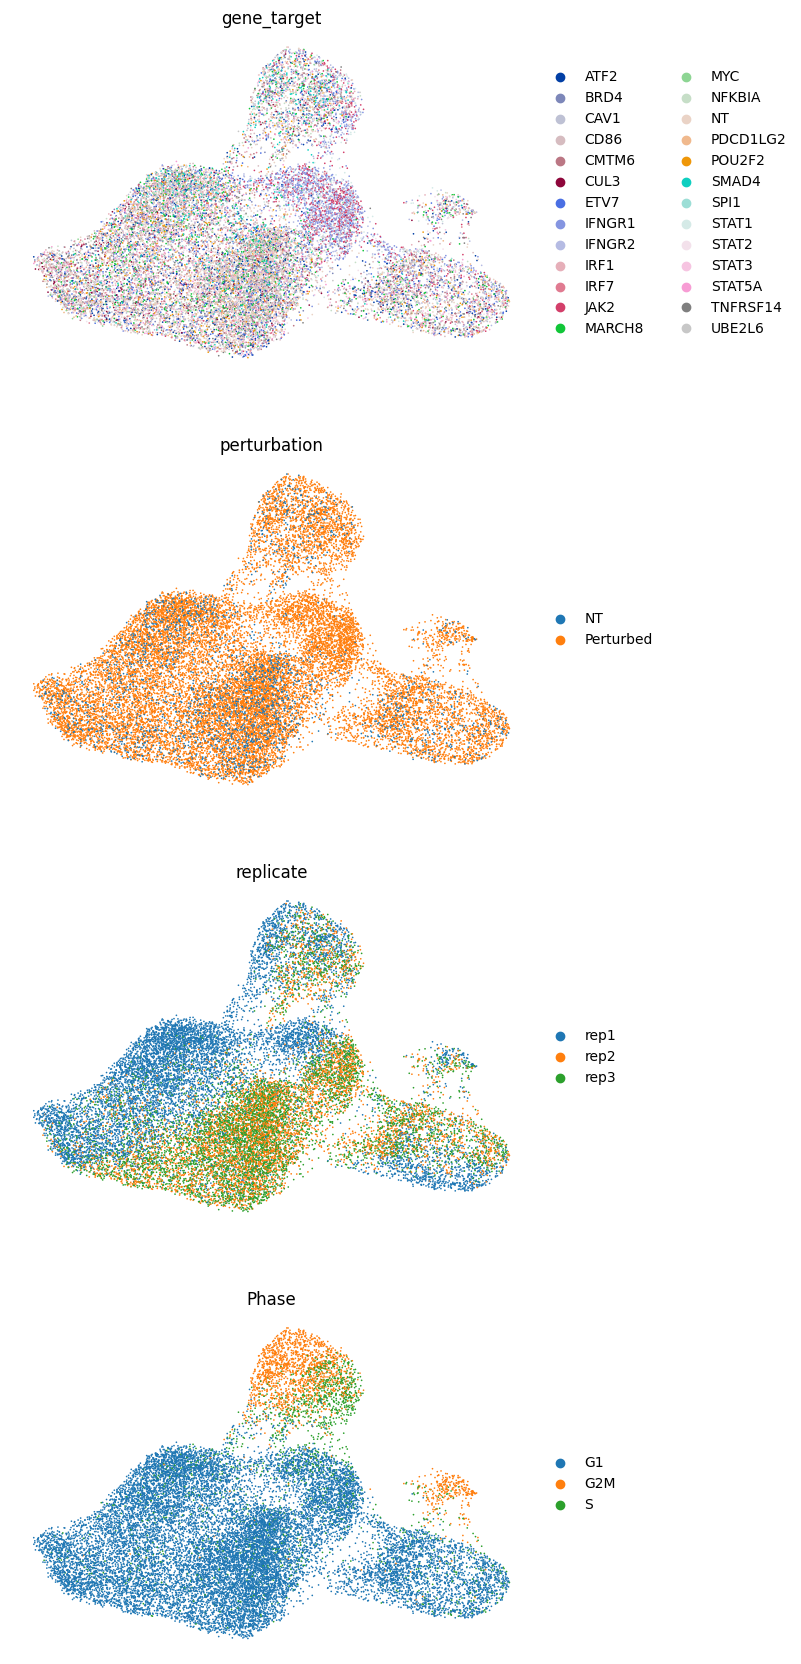

Unable to determine R library path: Command '('/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/bin/Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 127.


gene_target


/tmp/ipykernel_859577/127905917.py:13: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/gpfs/gibbs/project/wang_zuoheng/xx244/Ndreamer/reproducible/metrics.py:29: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major relea

['/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3'
 '/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/library']
R_HOME is already set to: /vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R
LISI---
cLISI, bLISI, LISI_F1 0.9215196480880681 0.25979792275891467 0.40532520003601474
ASW---
asw_label 0.5438540279865265
asw_batch 0.9110247993620121
kBET---
0 labels consist of a single batch or is too small. Skip.
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
Adding diffusion to step 8
Adding diffusion to step 9
Adding diffusion to step 10
kbet_score 0.8654932543871495
graph_conn 0.9462172154151762
NMI, ARI ---
NMI 0.43173277390827586
ARI 0.47793508911087584
positive and true positive rate---
                             ASW_label       ARI       NMI  1-cLISI     bLISI  \
X_effect_modifier_space_PCA   0.543854  0.477935  0.431733  0.92152  0.259798   

                             ASW_batch  kBET Accept

In [1]:
import scanpy as sc

adata1=sc.read_h5ad("./ECCITE_perturbation_nobatch/adata.h5ad")

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=15)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

for batch_keyi in ["gene_target","perturbation","replicate"]:
    print(batch_keyi)
    import rpy2.robjects as robjects
    import anndata2ri
    anndata2ri.activate()
    # Add your library path
    library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
    # Update R's library paths
    robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
    # Verify the updated library paths
    print(robjects.r('.libPaths()'))
    from metrics import calculate_metrics
    calculate_metrics(adata1, batch_key=batch_keyi, celltype_key="Phase", all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')
    print("="*20)

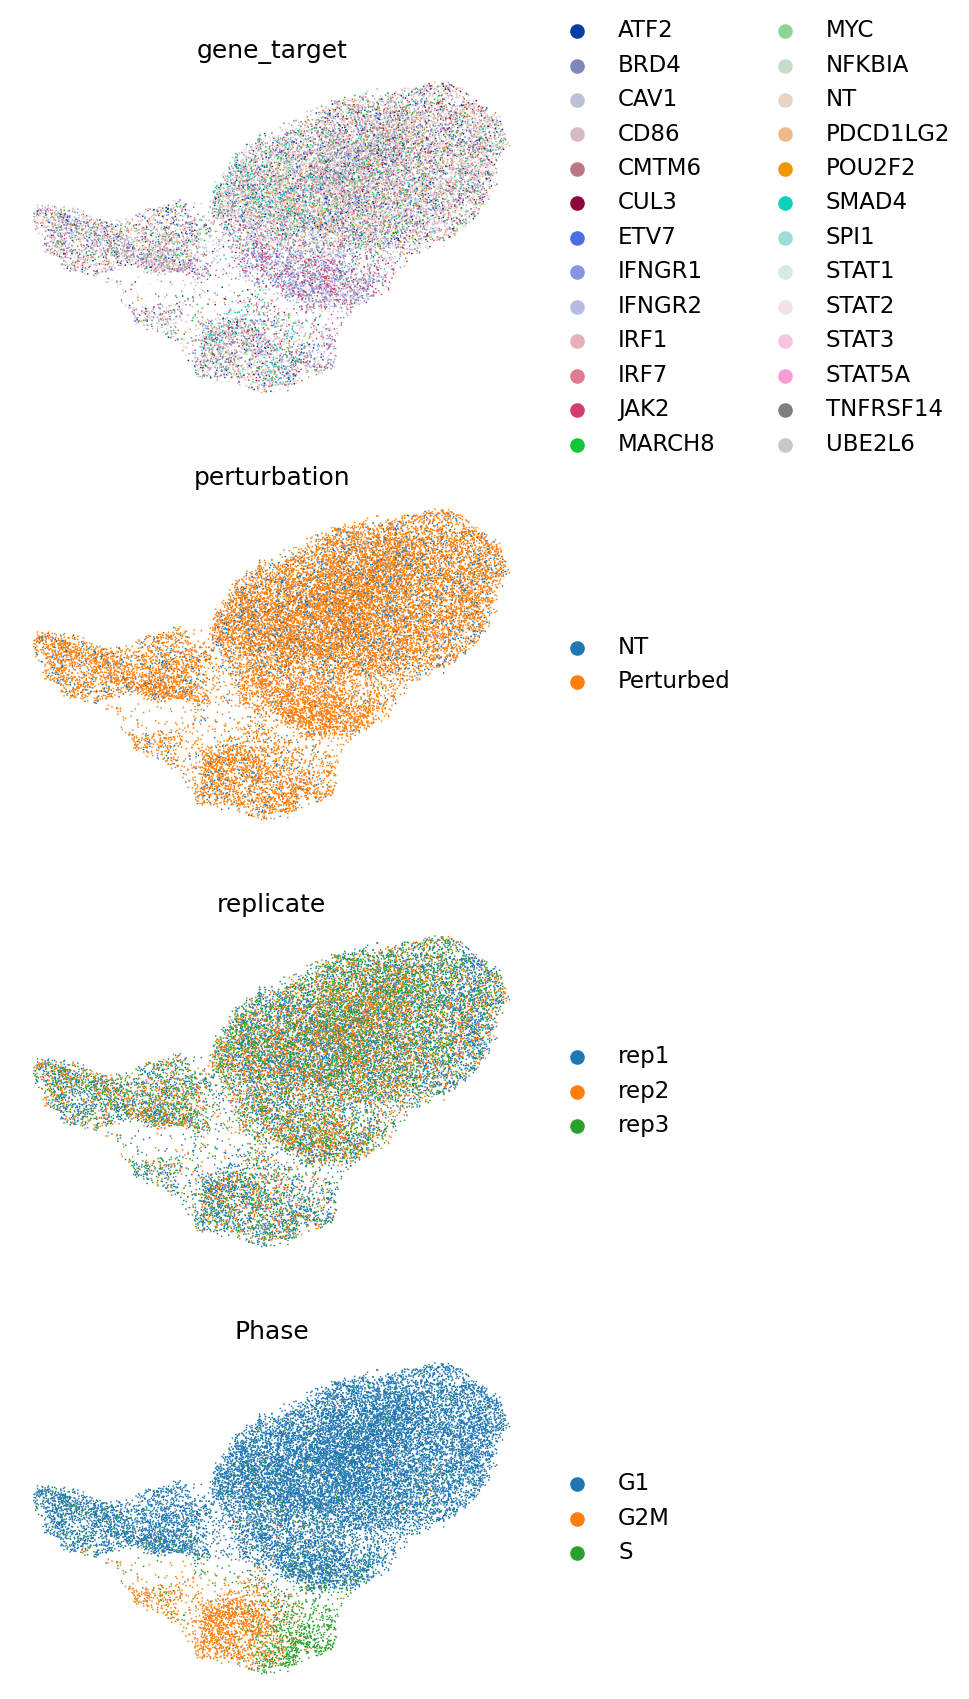

gene_target
['/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3'
 '/vast/palmer/apps/avx2/software/R/4.3.2-foss-2022b-patched/lib64/R/library']
LISI---
cLISI, bLISI, LISI_F1 0.9259990996045417 0.2603531913293082 0.4064337761936368
ASW---
asw_label 0.519734313711524
asw_batch 0.9104133527704752
kBET---
0 labels consist of a single batch or is too small. Skip.
Adding diffusion to step 4
Adding diffusion to step 5
Adding diffusion to step 6
Adding diffusion to step 7
kbet_score 0.8143657913585203
graph_conn 0.9296579057460231
NMI, ARI ---
NMI 0.40725814877588135
ARI 0.4773365260710841
positive and true positive rate---
                             ASW_label       ARI       NMI   1-cLISI  \
X_effect_modifier_space_PCA   0.519734  0.477337  0.407258  0.925999   

                                bLISI  ASW_batch  kBET Accept Rate  \
X_effect_modifier_space_PCA  0.260353   0.910413          0.814366   

                             graph connectivity  PCR_batch  pos rate  \
X_effect_modifier_space

In [ ]:
adata1=sc.read_h5ad("./ECCITE_perturbation/adata.h5ad")

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=15)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

for batch_keyi in ["gene_target","perturbation","replicate"]:
    print(batch_keyi)
    import rpy2.robjects as robjects
    import anndata2ri
    anndata2ri.activate()
    # Add your library path
    library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
    # Update R's library paths
    robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
    # Verify the updated library paths
    print(robjects.r('.libPaths()'))
    from metrics import calculate_metrics
    calculate_metrics(adata1, batch_key=batch_keyi, celltype_key="Phase", all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')
    print("="*20)

In [ ]:
adata1=sc.read_h5ad("./ECCITE/adata.h5ad")

sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=15)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=["gene_target","perturbation","replicate","Phase"], frameon=False, ncols=1)

for batch_keyi in ["gene_target","perturbation","replicate"]:
    print(batch_keyi)
    import rpy2.robjects as robjects
    import anndata2ri
    anndata2ri.activate()
    # Add your library path
    library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
    # Update R's library paths
    robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
    # Verify the updated library paths
    print(robjects.r('.libPaths()'))
    from metrics import calculate_metrics
    calculate_metrics(adata1, batch_key=batch_keyi, celltype_key="Phase", all=True, n_neighbors=25, embed='X_effect_modifier_space_PCA')
    print("="*20)

In [ ]:
adata=sc.read_h5ad("../data/ECCITE.h5ad")
print(adata)
sc.pl.umap(adata,color=["gene_target","perturbation","replicate","Phase"],ncols=1)